Nama: Tirta Nurrochman Bintang Prawira

NIM: 2241720045

Kelas: TI-3A


No Absen: 27

Tugas Praktikum

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

Instruksi Umum:

Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Mengimpor pustaka:
# numpy dan pandas untuk manipulasi data.
# matplotlib dan seaborn untuk visualisasi data.
# LabelEncoder dari sklearn.preprocessing digunakan untuk encoding variabel kategori.

# Membaca data: Membaca dataset dari file CSV yang berisi data asuransi.
data_tugas = pd.read_csv('insurance.csv')

# Melihat beberapa data awal: Menampilkan lima baris pertama dari dataset untuk mendapatkan gambaran awal.
print("Data awal: ")
print(data_tugas.head())

# Mengecek ukuran data: Menampilkan jumlah baris dan kolom dalam dataset.
print("\nUkuran data: ", data_tugas.shape)

# Informasi tentang data: Menampilkan informasi tentang tipe data, jumlah nilai yang ada di setiap kolom, serta ukuran memori yang digunakan.
print("\nInformasi data: ")
data_tugas.info()

# Deskripsi data: Menampilkan statistik deskriptif seperti mean, standar deviasi, min, max, dan kuartil untuk setiap kolom numerik.
print("\nDeskripsi data: ")
print(data_tugas.describe())

# Membuat objek LabelEncoder: LabelEncoder digunakan untuk mengubah data kategori menjadi data numerik. kategori adalah daftar kolom yang perlu diubah.
le = LabelEncoder()  # Membuat objek LabelEncoder
kategori = ['sex', 'smoker', 'region']

# Proses encoding: Mengubah nilai kategorikal menjadi numerik untuk kolom sex, smoker, dan region menggunakan LabelEncoder.
for kolom in kategori:
    data_tugas[kolom] = le.fit_transform(data_tugas[kolom])

# Melihat data setelah encoding: Menampilkan lima baris pertama dari dataset setelah kolom kategori diubah menjadi numerik.
print("\nData setelah encoding: ")
print(data_tugas.head())


Data awal: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Ukuran data:  (1338, 7)

Informasi data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Deskripsi data: 
               age     

Berikut adalah penjelasan singkat dari hasil output tersebut:

### 1. **Data Awal**:
   Dataset ini berisi informasi tentang beberapa variabel yang mungkin memengaruhi biaya asuransi seseorang. Variabelnya termasuk:
   - `age` (umur),
   - `sex` (jenis kelamin),
   - `bmi` (Body Mass Index, indikator obesitas),
   - `children` (jumlah anak),
   - `smoker` (apakah orang tersebut perokok atau tidak),
   - `region` (wilayah tempat tinggal),
   - `charges` (biaya asuransi).

### 2. **Ukuran Data**:
   Dataset memiliki **1338 baris** dan **7 kolom**, menunjukkan bahwa ada 1338 entri individu yang diamati.

### 3. **Informasi Data**:
   - Ada **3 kolom kategorikal** (`sex`, `smoker`, `region`) dengan tipe data `object`, yang nantinya perlu dikonversi menjadi numerik agar bisa digunakan dalam model machine learning.
   - Tidak ada **missing values**, yang berarti dataset ini lengkap tanpa data yang hilang.

### 4. **Deskripsi Data**:
   Statistik deskriptif untuk variabel numerik:
   - Rata-rata usia (`age`) adalah sekitar **39 tahun** dengan rentang usia antara **18** dan **64**.
   - Rata-rata **BMI** adalah **30.66**, yang menunjukkan bahwa banyak individu dalam dataset berada dalam kategori **overweight** (BMI > 25).
   - Biaya asuransi (`charges`) sangat bervariasi, dengan biaya rata-rata sekitar **13,270** dan biaya maksimum mencapai **63,770**.
   - Banyak orang yang memiliki **0 sampai 2 anak**.

### 5. **Data Setelah Encoding**:
   Setelah dilakukan **encoding**:
   - `sex`: 0 untuk perempuan, 1 untuk laki-laki.
   - `smoker`: 0 untuk non-perokok, 1 untuk perokok.
   - `region`: wilayah yang sudah diubah menjadi angka (0, 1, 2, 3).

### **Kesimpulan**:
   - Dataset ini siap digunakan untuk analisis lebih lanjut atau modeling setelah kategori telah diencode.
   - Terdapat variasi besar dalam biaya asuransi, yang mungkin dipengaruhi oleh variabel seperti perokok atau tidak, BMI, dan umur.
   - Dengan sebagian besar orang berumur sekitar 39 tahun dan memiliki BMI lebih dari 30, fokus pada faktor kesehatan seperti merokok dan obesitas bisa menjadi penentu utama dalam prediksi biaya asuransi.

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [36]:
# Contoh data (sesuaikan dengan data aslinya)
data_tugas = pd.read_csv('insurance.csv')

# Membuat variabel bebas X dan target Y
X = data_tugas[['smoker', 'age', 'bmi']]  # Pilihan fitur independen
y = data_tugas[['charges']]  # Target yang ingin diprediksi

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data yang telah dipisah
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target uji (y_test):", y_test.shape)


Ukuran data latih (X_train): (1070, 3)
Ukuran data uji (X_test): (268, 3)
Ukuran target latih (y_train): (1070, 1)
Ukuran target uji (y_test): (268, 1)


Berdasarkan hasil keluaran dari proses pembagian dataset:

- **Ukuran data latih (X_train): (1070, 3)**
  Ini berarti data latih yang digunakan untuk melatih model memiliki 1.070 sampel dengan 3 fitur independen (yaitu 'smoker', 'age', dan 'bmi').

- **Ukuran data uji (X_test): (268, 3)**
  Data uji memiliki 268 sampel, dengan jumlah fitur independen yang sama (3 fitur: 'smoker', 'age', dan 'bmi'). Data ini akan digunakan untuk mengevaluasi performa model setelah dilatih.

- **Ukuran target latih (y_train): (1070, 1)**
  Target latih memiliki 1.070 sampel dengan 1 variabel target, yaitu 'charges' (biaya medis). Ini berhubungan dengan data latih yang digunakan untuk memprediksi biaya berdasarkan fitur independennya.

- **Ukuran target uji (y_test): (268, 1)**
  Target uji memiliki 268 sampel yang juga berisi nilai biaya medis ('charges'). Data ini akan digunakan untuk membandingkan prediksi model dengan nilai sebenarnya dalam data uji.

### Kesimpulan:
- Dataset telah dibagi dengan baik menggunakan rasio 80% untuk data latih dan 20% untuk data uji.
- Data latih memiliki lebih banyak sampel dibandingkan data uji, yang memastikan bahwa model mendapatkan informasi yang cukup selama pelatihan.
- Setiap sampel pada data latih dan uji memiliki tiga fitur (independen), dan satu target (dependent).
- Pembagian data ini ideal untuk mengevaluasi performa model karena data uji yang terpisah akan digunakan untuk menguji kemampuan generalisasi model, mengurangi risiko overfitting terhadap data latih.

3. Lakukan feature scaling jika diperlukan.

In [60]:
# Import library yang diperlukan
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Contoh data (sesuaikan dengan data aslinya)
data_tugas = pd.read_csv('insurance.csv')

# Membuat variabel bebas X dan target Y
X = data_tugas[['smoker', 'age', 'bmi']]  # Fitur independen

# Melakukan feature scaling pada fitur numerik ('age', 'bmi'), tapi tidak pada 'smoker'
scaler = StandardScaler()

# Scaling hanya pada kolom 'age' dan 'bmi'
X.loc[:, ['age', 'bmi']] = scaler.fit_transform(X[['age', 'bmi']])

# Mengonversi kembali ke DataFrame untuk menjaga nama kolom
X = pd.DataFrame(X, columns=['smoker', 'age', 'bmi'])

# Menampilkan contoh hasil scaling
print("Data setelah scaling:")
print(X.head())


Data setelah scaling:
  smoker       age       bmi
0    yes -1.438764 -0.453320
1     no -1.509965  0.509621
2     no -0.797954  0.383307
3     no -0.441948 -1.305531
4     no -0.513149 -0.292556


### Penjelasan:
Hasil di atas menunjukkan data setelah diterapkan **feature scaling** pada kolom numerik ('age' dan 'bmi'). Fitur-fitur tersebut telah diubah sehingga nilai-nilainya berada dalam skala yang seragam dengan rata-rata 0 dan deviasi standar 1. Fitur biner 'smoker' tidak mengalami perubahan dalam proses scaling.

- **'age' dan 'bmi'**: Telah di-scale menggunakan `StandardScaler`, menghasilkan nilai dengan rata-rata 0 dan deviasi standar 1. Misalnya, nilai `-1.438764` pada kolom 'age' menunjukkan bahwa usia tersebut berada 1.44 deviasi standar di bawah rata-rata.

- **'smoker'**: Kolom ini tetap dalam format kategorikal, yang biasanya tidak di-scale.

### Kesimpulan:
1. **Fitur Numerik Terstandardisasi**: Kolom 'age' dan 'bmi' telah melalui proses scaling, yang membantu model pembelajaran mesin untuk lebih baik dalam memproses fitur-fitur dengan skala yang berbeda. Ini memudahkan model dalam perhitungan dan bisa meningkatkan performa model.

2. **Kepastian Konsistensi Data**: Dengan melakukan scaling, Anda memastikan bahwa fitur numerik berada dalam skala yang seragam, yang mengurangi potensi bias yang disebabkan oleh perbedaan skala antar fitur.

3. **Fitur Kategorikal Tidak Diubah**: Fitur 'smoker' yang bersifat kategorikal tetap tidak diubah, karena scaling biasanya tidak diterapkan pada data kategorikal.

4. Buat model multiple linear regression menggunakan Scikit-Learn.


In [58]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [61]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
data_tugas = pd.read_csv('insurance.csv')

# Membuat variabel bebas X dan target Y
X = data_tugas[['age', 'bmi', 'children']]  # Asumsi hanya menggunakan fitur numerik
y = data_tugas[['charges']]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LinearRegression()  # Definisi model di sini
model.fit(X_train, y_train)  # Melatih model

# Membuat prediksi
y_pred = model.predict(X_test)  # Prediksi pada data uji

# Menampilkan beberapa hasil prediksi
print("hasil prediksi:", y_pred[:5])


hasil prediksi: [[13305.28945949]
 [11801.95170145]
 [16941.71437111]
 [14278.42206855]
 [ 8680.25439362]]


### Penjelasan:

- **Memisahkan Data**: Data dibagi menjadi data latih dan data uji.
- **Melatih Model**: Model dilatih dengan data latih.
- **Membuat Prediksi**: Model digunakan untuk memprediksi nilai target pada data uji.
- **Menampilkan Hasil**: Menampilkan beberapa hasil prediksi.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [62]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 9181.311632897381
MSE: 131201335.64669806
RMSE: 11454.315153980095
R-squared: 0.15489592484270753


### Penjelasan:

- **MAE (Mean Absolute Error)**: `9181.31`
  - Rata-rata selisih absolut antara nilai prediksi dan nilai aktual. Kesalahan prediksi rata-rata adalah sekitar 9181.31 unit.

- **MSE (Mean Squared Error)**: `131,201,335.65`
  - Rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Nilai ini menunjukkan besarnya kesalahan kuadrat secara rata-rata.

- **RMSE (Root Mean Squared Error)**: `11,454.32`
  - Akar kuadrat dari MSE. Menunjukkan kesalahan rata-rata dalam unit yang sama dengan target, yaitu sekitar 11,454.32 unit.

- **R-squared**: `0.1549`
  - Proporsi variansi target yang dapat dijelaskan oleh model. Nilai ini menunjukkan model hanya menjelaskan sekitar 15.49% dari variansi target.

### Kesimpulan:

Model regresi linier yang digunakan memiliki kesalahan prediksi yang signifikan (MAE, MSE, RMSE cukup tinggi) dan hanya mampu menjelaskan sedikit dari variansi target (R-squared rendah). Ini menunjukkan bahwa model mungkin tidak fit dengan baik untuk data dan bisa jadi perlu dipertimbangkan pendekatan atau fitur tambahan untuk meningkatkan kinerjanya.

Visualisasi Data

MAE: 9181.311632897381
MSE: 131201335.64669806
RMSE: 11454.315153980095
R-squared: 0.15489592484270753


c:\Users\tirta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


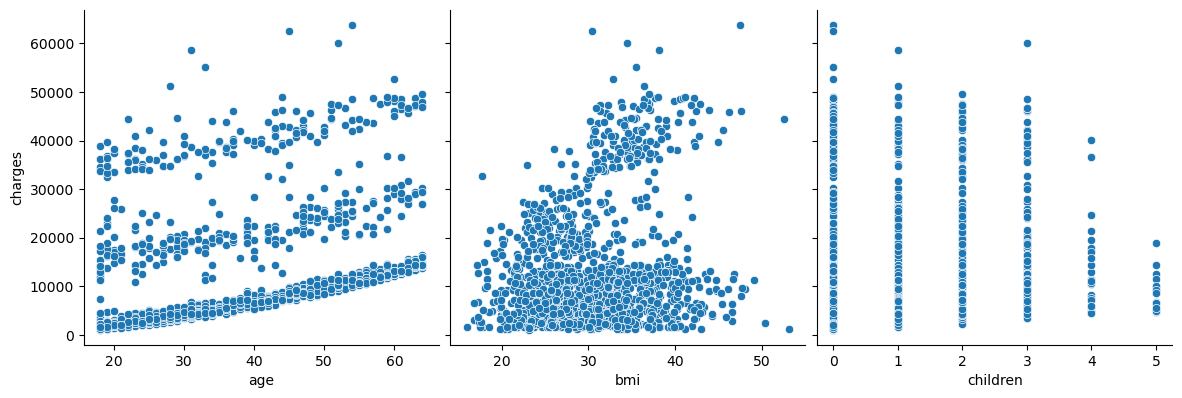

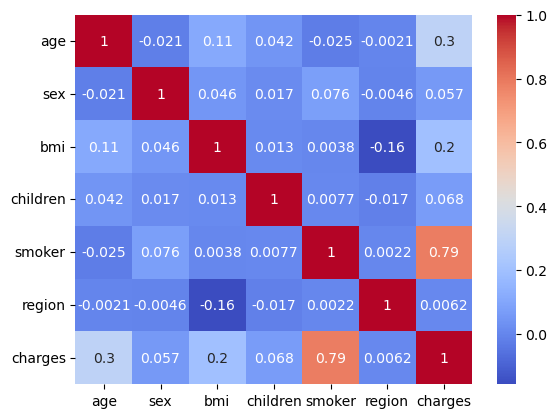

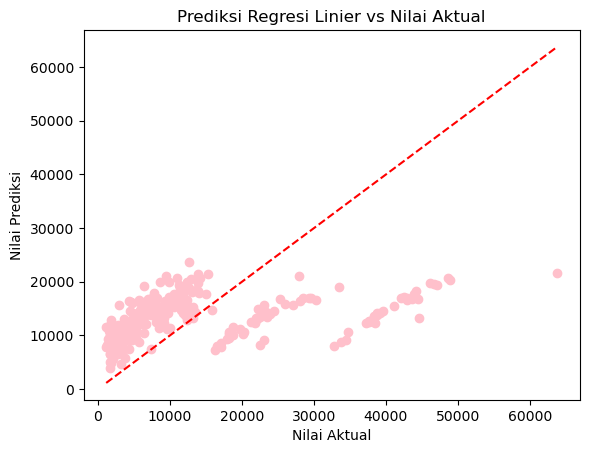

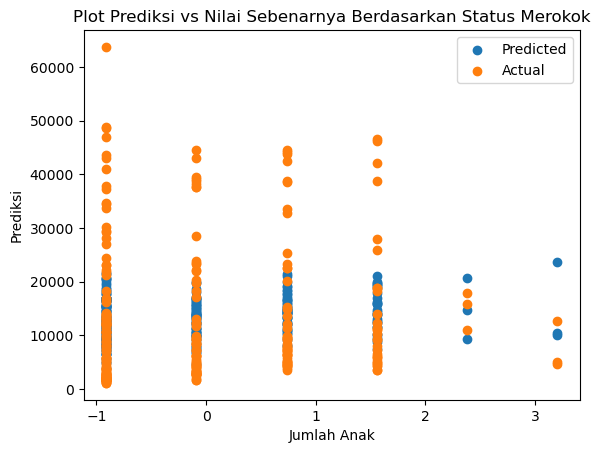

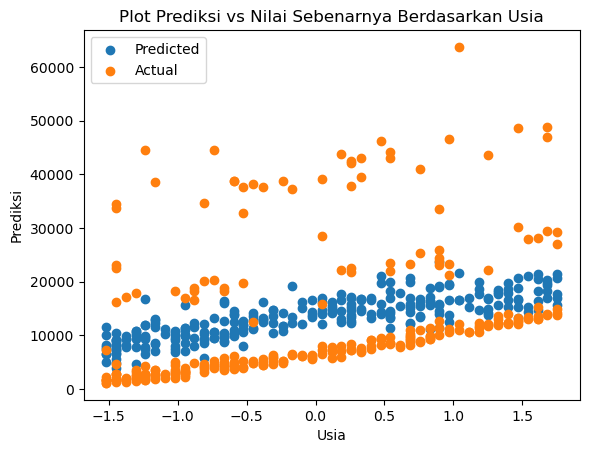

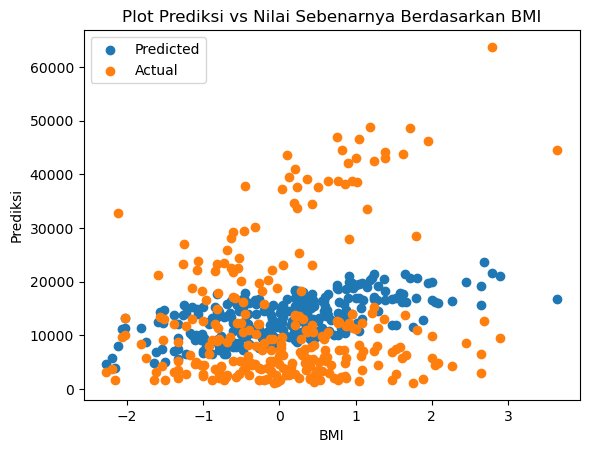

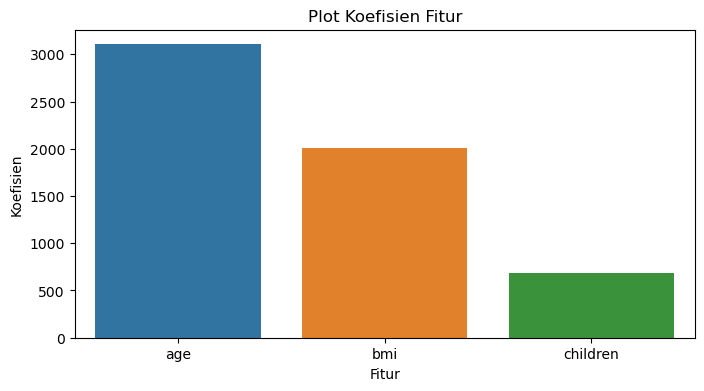

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data_tugas = pd.read_csv('insurance.csv')

# Encoding categorical variables
data_tugas['sex'] = data_tugas['sex'].map({'female': 0, 'male': 1})
data_tugas['smoker'] = data_tugas['smoker'].map({'no': 0, 'yes': 1})
data_tugas['region'] = data_tugas['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Features and target
X = data_tugas[['age', 'bmi', 'children']]
y = data_tugas[['charges']]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# Visualisasi data dengan pairplot
sns.pairplot(data_tugas, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

# Visualisasi korelasi dengan heatmap
sns.heatmap(data_tugas.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plot untuk Regresi Linier
plt.scatter(y_test, y_pred, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi Regresi Linier vs Nilai Aktual')
plt.show()

# Scatter plot berdasarkan status merokok
plt.scatter(X_test[:, 2], y_pred, color='#1f77b4', label='Predicted')
plt.scatter(X_test[:, 2], y_test, color='#ff7f0e', label='Actual')
plt.xlabel('Jumlah Anak')
plt.ylabel('Prediksi')
plt.title('Plot Prediksi vs Nilai Sebenarnya Berdasarkan Status Merokok')
plt.legend()
plt.show()

# Scatter plot berdasarkan usia
plt.scatter(X_test[:, 0], y_pred, color='#1f77b4', label='Predicted')
plt.scatter(X_test[:, 0], y_test, color='#ff7f0e', label='Actual')
plt.xlabel('Usia')
plt.ylabel('Prediksi')
plt.title('Plot Prediksi vs Nilai Sebenarnya Berdasarkan Usia')
plt.legend()
plt.show()

# Scatter plot berdasarkan BMI
plt.scatter(X_test[:, 1], y_pred, color='#1f77b4', label='Predicted')
plt.scatter(X_test[:, 1], y_test, color='#ff7f0e', label='Actual')
plt.xlabel('BMI')
plt.ylabel('Prediksi')
plt.title('Plot Prediksi vs Nilai Sebenarnya Berdasarkan BMI')
plt.legend()
plt.show()

# Plot Koefisien Fitur
koefisien = model.coef_[0]
fitur = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=fitur, y=koefisien)
plt.xlabel('Fitur')
plt.ylabel('Koefisien')
plt.title('Plot Koefisien Fitur')
plt.show()


Plot Koefisien dalam regresi linier menunjukkan seberapa besar kontribusi setiap fitur. Dapat dilihat pada plot koefisien di atas bahwa variabel smoker berkontribusi dan berpengaruh positif terhadap variabel charges dan paling mempengaruhi diantara variabel lainnya.

Catatan Tambahan:
Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

Pengumpulan Tugas
Tugas praktikum ini dikumpulkan dalam bentuk laporan berformat dokumen (.doc) dan kode program Python yang digunakan (dalam format .py atau .ipynb). Tugas dikumpulkan ke dosen pengampu sesuai dengan jadwal yang telah ditentukan.

Selamat mengerjakan tugas praktikum! Jika Anda mengalami kesulitan, jangan ragu untuk berkonsultasi dengan dosen pengampu